# klasifikasi Tomat

Step by Step membuat klasifikasi tomat apakah termasuk ke dalam grade Ekspor, Lokal Premium atau Industri

Grade:
1. Ekspor = grade tertinggi, untuk ekspor
2. Lokal Premium = grade menengah. untuk didistriibusikan ke swalayan/toko
3. Industri = grade trebawah, untuk dikirim ke pabrik saus tomat



In [14]:
# mengimport pandas dan memanggil dataset
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")


In [12]:
# menampilkan colums beserta tipe datanya
df.dtypes


berat            int64
kekenyalan     float64
kadar_gula     float64
tebal_kulit    float64
grade           object
dtype: object

In [13]:
df.head(3)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor


In [15]:
# menampilkan 3 data terbawah
df.tail(3)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri
89,198,3.6,2.6,0.54,Industri


In [18]:
# menampilkan isian kolom grade beserta jumlah masing-masing
df["grade"].value_counts()


grade
Ekspor           30
Lokal Premium    30
Industri         30
Name: count, dtype: int64

In [19]:
# menampilkan struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   berat        90 non-null     int64  
 1   kekenyalan   90 non-null     float64
 2   kadar_gula   90 non-null     float64
 3   tebal_kulit  90 non-null     float64
 4   grade        90 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [20]:
# menampilkan statistik dataframe
df.describe()

,berat,kekenyalan,kadar_gula,tebal_kulit
count,90.000000,90.000000,90.000000,90.000000
mean,142.388889,6.547778,3.956667,0.721778
std,37.919398,1.933456,0.785265,0.126461
min,85.000000,3.400000,2.600000,0.510000
25%,104.250000,4.525000,3.225000,0.592500
50%,143.000000,6.850000,4.000000,0.730000
75%,175.500000,8.375000,4.700000,0.847500
max,210.000000,9.400000,5.200000,0.920000


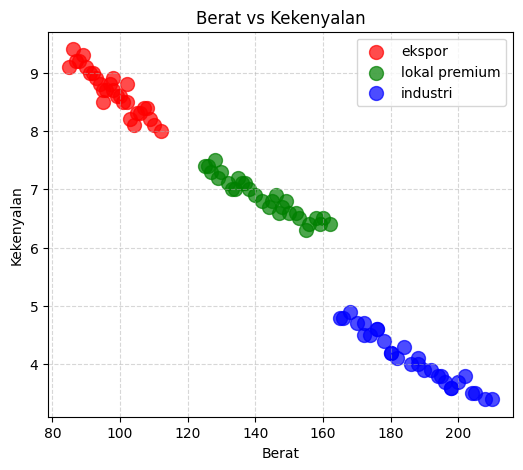

In [48]:
# visualilisasi data dengan matplotlib
# import matplotlib
import matplotlib.pyplot as plt

# siapkan data yang akan divisualisasikan
ekspor = df[df["grade"]=="Ekspor"]
lokal_premium = df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

# buat ukuran bingkai / figura
plt.figure(figsize=(6,5))

plt.scatter(ekspor["berat"], ekspor["kekenyalan"], s=100, alpha=0.7, color="red", label="ekspor")
plt.scatter(lokal_premium["berat"], lokal_premium["kekenyalan"], s=100, alpha=0.7, color="green", label="lokal premium")
plt.scatter(industri["berat"], industri["kekenyalan"], s=100, alpha=0.7, color="blue", label="industri")
plt.xlabel("Berat")
plt.ylabel("Kekenyalan")
plt.title("Berat vs Kekenyalan")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()



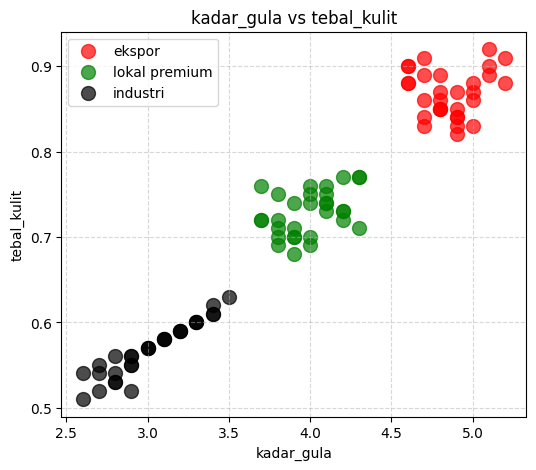

In [50]:
# visualilisasi data dengan matplotlib
# import matplotlib
import matplotlib.pyplot as plt

# siapkan data yang akan divisualisasikan
ekspor = df[df["grade"]=="Ekspor"]
lokal_premium = df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

# buat ukuran bingkai / figura
plt.figure(figsize=(6,5))

plt.scatter(ekspor["kadar_gula"], ekspor["tebal_kulit"], s=100, alpha=0.7, color="red", label="ekspor")
plt.scatter(lokal_premium["kadar_gula"], lokal_premium["tebal_kulit"], s=100, alpha=0.7, color="green", label="lokal premium")
plt.scatter(industri["kadar_gula"], industri["tebal_kulit"], s=100, alpha=0.7, color="black", label="industri")
plt.xlabel("kadar_gula")
plt.ylabel("tebal_kulit")
plt.title("kadar_gula vs tebal_kulit")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()




In [70]:
# import libarary yang dibutuhkan
# 'sediakan alat'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# siapkan faetures dan target/label
# 'siapkan bahan'
# kolom untuk features
X = df[["berat","kekenyalan","kadar_gula","tebal_kulit"]]

# kolom untuk target
y = df["grade"]

#pisahkan X dan y menjadi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state=41

)

# siapkan scaler
# 'siapkan pengompres angkanya'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# buat algoritma machine laerning-nya
# 'buat otak baru'
model = LogisticRegression()

# 'suruh otak belajar dari latihan soal + kunci latihan'
model.fit(X_train_scaled, y_train)

# 'suruh otak ulangan, simpan jawabannya di y_pred'
y_pred = model.predict(X_test_scaled)

# 'bandingkan kunci jawaban  dengan jawaban ulangannya'
print("Akurasi :", accuracy_score(y_test, y_pred))



Akurasi : 1.0


In [71]:
# menampilkan urutan class pada model
model.classes_

array(['Ekspor', 'Industri', 'Lokal Premium'], dtype=object)

In [87]:
data_baru = pd.DataFrame([[156, 6.5, 3.0, 0.7]], columns=["berat","kekenyalan","kadar_gula","tebal_kulit"])
data_baru_scaled = scaler.transform(data_baru)

print(model.predict(data_baru_scaled)[0])
print(model.classes_)
print(model.predict_proba(data_baru_scaled)[0])
print("----------------------")

# kode yang akan sering digunakan

prediksi = model.predict(data_baru_scaled)[0]
presentase = max(model.predict_proba(data_baru_scaled)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Lokal Premium
['Ekspor' 'Industri' 'Lokal Premium']
[0.00137912 0.28857691 0.71004397]
----------------------
Model memprediksi Lokal Premium dengan tingkat keyakinan 71.00%


In [88]:
import joblib

joblib.dump(model,"model_klasifikasi_tomat.joblib")
joblib.dump(scaler,"scaler_klasifikasi_tomat.joblib")

['scaler_klasifikasi_tomat.joblib']